In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

df = pd.read_csv("../../datasets/household_power_consumption.txt", sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')
print("Length of dataset", len(df))
print(df.head())
df.describe()

Length of dataset 2075259
                     Global_active_power  Global_reactive_power  Voltage  \
dt                                                                         
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
dt                                                                      
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
200

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [2]:
# filling nan with mean in any columns
print("Before:",df.isnull().sum())
for j in range(0,7):        
        df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())
print("After:", df.isnull().sum())


Before: Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64
After: Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


In [3]:
# here we split the data into different granularity (hours, days, weeks, months)
df_minute = df
df_hours = df.resample("h").mean()
df_days = df.resample("D").mean()
df_weeks = df.resample("W").mean()
df_months = df.resample("M").mean()
print("Length of minute dataset:", len(df_minute))
print("Length of hours dataset:", len(df_hours))
print("Length of days dataset:", len(df_days))
print("Length of weeks dataset:", len(df_weeks))
print("Length of months dataset:", len(df_months))

print("---MINUTE---")
print(df_minute.head())
print("---HOURS---")
print(df_hours.head())
print("---DAYS---")
print(df_days.head())
print("---WEEKS---")
print(df_weeks.head())
print("---MONTHS---")
print(df_months.head())


Length of minute dataset: 2075259
Length of hours dataset: 34589
Length of days dataset: 1442
Length of weeks dataset: 207
Length of months dataset: 48
---MINUTE---
                     Global_active_power  Global_reactive_power  Voltage  \
dt                                                                         
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
dt                                                                      
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16

Text(0.5, 0.98, 'Graph in terms of months')

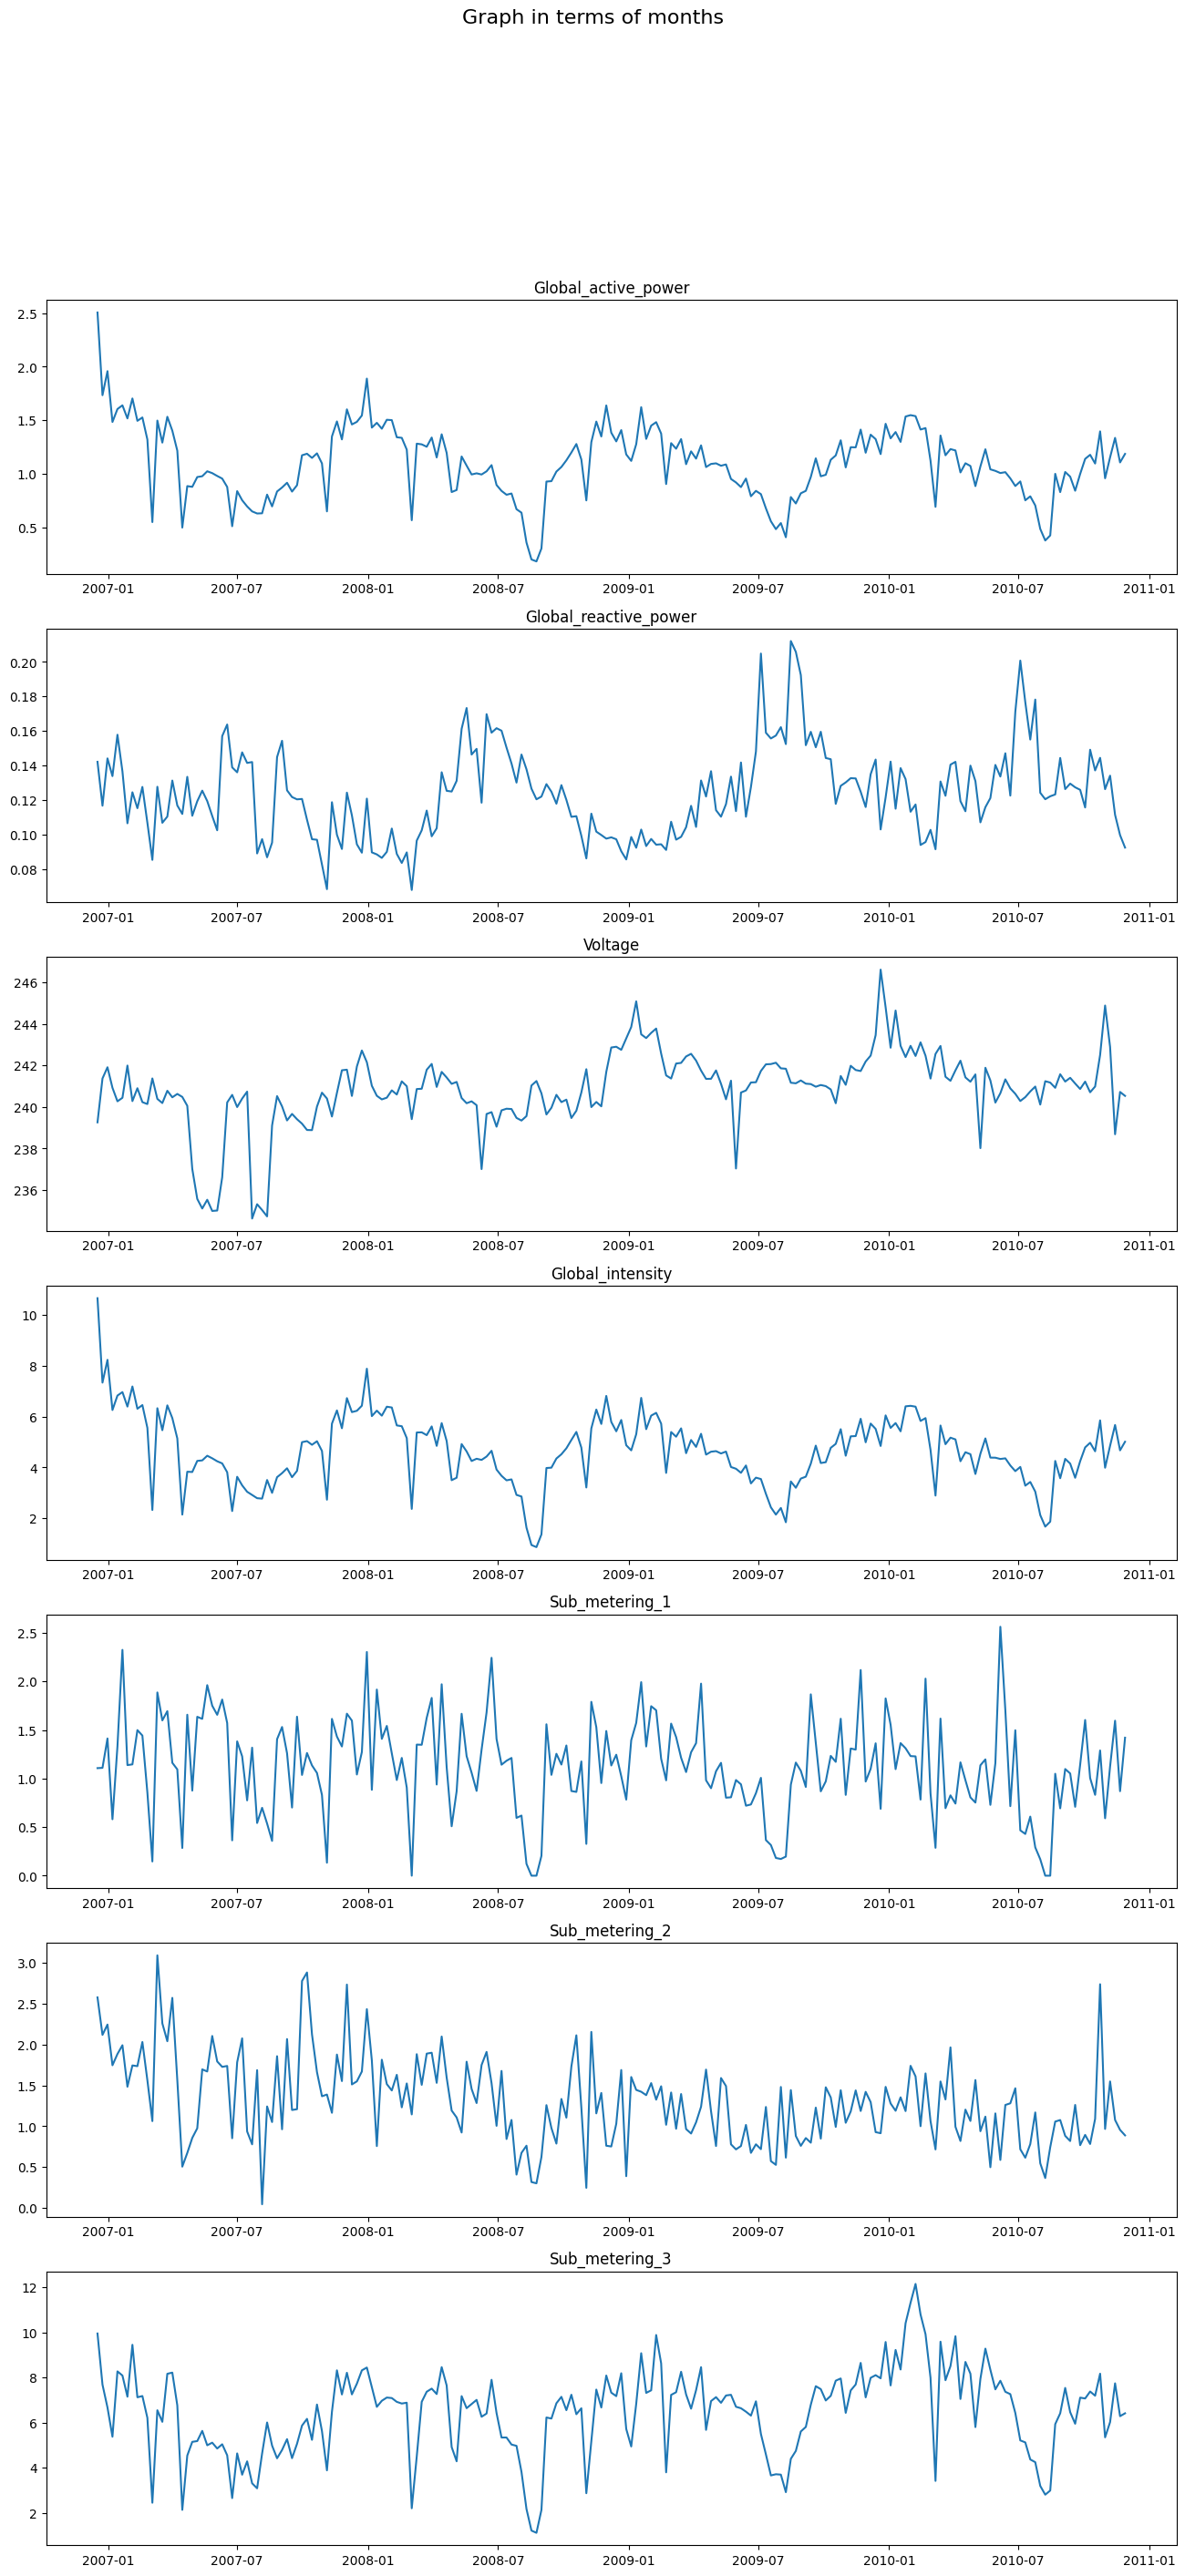

In [4]:

# Visualize the data
fig, (axs) = plt.subplots(7, figsize=(16, 32))

axs[0].plot(df_weeks["Global_active_power"])
axs[0].set_title("Global_active_power")
axs[1].plot(df_weeks["Global_reactive_power"])
axs[1].set_title("Global_reactive_power")
axs[2].plot(df_weeks["Voltage"])
axs[2].set_title("Voltage")
axs[3].plot(df_weeks["Global_intensity"])
axs[3].set_title("Global_intensity")
axs[4].plot(df_weeks["Sub_metering_1"])
axs[4].set_title("Sub_metering_1")
axs[5].plot(df_weeks["Sub_metering_2"])
axs[5].set_title("Sub_metering_2")
axs[6].plot(df_weeks["Sub_metering_3"])
axs[6].set_title("Sub_metering_3")

fig.suptitle("Graph in terms of months", fontsize=16)


In [9]:
# Data splitting 
from sklearn.preprocessing import MinMaxScaler
# Choosing prediction column 
col_to_predict = 1
# For now I am only using Global_active_power to predict Global_active_power (days)
# dataset = df["Global_active_power"]
dataset = df_days["Global_active_power"]
# dataset = df_hours["Global_active_power"]
dataset = pd.DataFrame(dataset)

# All the hyperparameters here including the patch sizes are the same as delhi.ipynb just to keep things consistent
data = dataset.values
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(data))
train_size = int(len(scaled_data) * 0.5)
val_size = int(0.75 * len(scaled_data)) - train_size
train_data = scaled_data[0:train_size, :]
val_data = scaled_data[train_size:train_size + val_size, :]
test_data = scaled_data[train_size + val_size:, :]
print(f"Scaled data size: {len(scaled_data)} | Train data size: {len(train_data)} | Val data size: {len(val_data)} | Test data size: {len(test_data)} ")

patch_size5 = 5
patch_size20 = 20
patch_size60 = 60

def getDataWithPatch(patch, stride, data_list):
    
    x = []
    y = []
    for i in range(patch, len(data_list), stride):
        x.append(data_list[i-patch:i, :])
        y.append(data_list[i, :col_to_predict])
    
    # Convert to numpy array
    x, y = np.array(x), np.array(y)
    # Reshaping the input to (n_samples, time_steps, n_feature)
    x = np.reshape(x, (x.shape[0], x.shape[1], col_to_predict))
    return x, y
    
# For now, assume a stride of 0 (no overlaps for now)
x_train, y_train = getDataWithPatch(1, 1, train_data)
x_train_p5, y_train_p5 = getDataWithPatch(patch_size5, patch_size5, train_data)
x_train_p20, y_train_p20 = getDataWithPatch(patch_size20, patch_size20, train_data)
x_train_p60, y_train_p60 = getDataWithPatch(patch_size60, patch_size60, train_data)

x_val, y_val = getDataWithPatch(1, 1, val_data)
x_val_p5, y_val_p5 = getDataWithPatch(patch_size5, patch_size5, val_data)
x_val_p20, y_val_p20 = getDataWithPatch(patch_size20, patch_size20, val_data)
x_val_p60, y_val_p60 = getDataWithPatch(patch_size60, patch_size60, val_data)

x_test, y_test = getDataWithPatch(1, 1, test_data)
x_test_p5, y_test_p5 = getDataWithPatch(patch_size5, patch_size5, test_data)
x_test_p20, y_test_p20 = getDataWithPatch(patch_size20, patch_size20, test_data)
x_test_p60, y_test_p60 = getDataWithPatch(patch_size60, patch_size60, test_data)

Scaled data size: 1442 | Train data size: 721 | Val data size: 360 | Test data size: 361 


In [10]:

from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Dropout
model = Sequential([
    LSTM(50, return_sequences= True, input_shape= (x_train.shape[1], col_to_predict)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(col_to_predict)
])

model.compile(optimizer= 'adam', loss= 'mse' , metrics= "mean_absolute_error")
model.summary()

model_p5 = Sequential([
    LSTM(50, return_sequences= True, input_shape= (x_train_p5.shape[1], col_to_predict)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(col_to_predict)
])

model_p5.compile(optimizer= 'adam', loss= 'mse' , metrics= "mean_absolute_error")
model_p5.summary()

model_p20 = Sequential([
    LSTM(50, return_sequences= True, input_shape= (x_train_p20.shape[1], col_to_predict)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(col_to_predict)
])

model_p20.compile(optimizer= 'adam', loss= 'mse' , metrics= "mean_absolute_error")
model_p20.summary()

model_p60 = Sequential([
    LSTM(50, return_sequences= True, input_shape= (x_train_p60.shape[1], col_to_predict)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(col_to_predict)
])

model_p60.compile(optimizer= 'adam', loss= 'mse' , metrics= "mean_absolute_error")
model_p60.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 1, 50)             10400     
                                                                 
 lstm_9 (LSTM)               (None, 64)                29440     
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 42,465
Trainable params: 42,465
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_5"
____________________________

In [11]:
history = model.fit(x_train, y_train, epochs= 100, batch_size= 32)


Epoch 1/100
23/23 [==============================] - 5s 5ms/step - loss: 0.0444 - mean_absolute_error: 0.1648
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0207 - mean_absolute_error: 0.1097
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0179 - mean_absolute_error: 0.1025
Epoch 4/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0161 - mean_absolute_error: 0.0976
Epoch 5/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0144 - mean_absolute_error: 0.0909
Epoch 6/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0139 - mean_absolute_error: 0.0895
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0140 - mean_absolute_error: 0.0898
Epoch 8/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0138 - mean_absolute_error: 0.0896
Epoch 9/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0139 - mean_absolute_error: 0.0894
Epoch 10/1

In [12]:
history_p5 = model_p5.fit(x_train_p5, y_train_p5, epochs= 100, batch_size= 32)

Epoch 1/100
5/5 [==============================] - 3s 9ms/step - loss: 0.0639 - mean_absolute_error: 0.2058
Epoch 2/100
5/5 [==============================] - 0s 10ms/step - loss: 0.0231 - mean_absolute_error: 0.1221
Epoch 3/100
5/5 [==============================] - 0s 9ms/step - loss: 0.0241 - mean_absolute_error: 0.1294
Epoch 4/100
5/5 [==============================] - 0s 9ms/step - loss: 0.0177 - mean_absolute_error: 0.0983
Epoch 5/100
5/5 [==============================] - 0s 9ms/step - loss: 0.0207 - mean_absolute_error: 0.1035
Epoch 6/100
5/5 [==============================] - 0s 8ms/step - loss: 0.0177 - mean_absolute_error: 0.0968
Epoch 7/100
5/5 [==============================] - 0s 8ms/step - loss: 0.0172 - mean_absolute_error: 0.1021
Epoch 8/100
5/5 [==============================] - 0s 9ms/step - loss: 0.0175 - mean_absolute_error: 0.1031
Epoch 9/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0167 - mean_absolute_error: 0.0955
Epoch 10/100
5/5 [=========

In [13]:
history_p20 = model_p20.fit(x_train_p20, y_train_p20, epochs= 100, batch_size= 32)

Epoch 1/100
2/2 [==============================] - 3s 36ms/step - loss: 0.0806 - mean_absolute_error: 0.2508
Epoch 2/100
2/2 [==============================] - 0s 23ms/step - loss: 0.0162 - mean_absolute_error: 0.0985
Epoch 3/100
2/2 [==============================] - 0s 19ms/step - loss: 0.0240 - mean_absolute_error: 0.1282
Epoch 4/100
2/2 [==============================] - 0s 15ms/step - loss: 0.0373 - mean_absolute_error: 0.1721
Epoch 5/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0193 - mean_absolute_error: 0.1120
Epoch 6/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0112 - mean_absolute_error: 0.0807
Epoch 7/100
2/2 [==============================] - 0s 21ms/step - loss: 0.0141 - mean_absolute_error: 0.0905
Epoch 8/100
2/2 [==============================] - 0s 22ms/step - loss: 0.0171 - mean_absolute_error: 0.1015
Epoch 9/100
2/2 [==============================] - 0s 19ms/step - loss: 0.0174 - mean_absolute_error: 0.1023
Epoch 10/100
2/2 [=

In [14]:
history_p60 = model_p60.fit(x_train_p60, y_train_p60, epochs= 100, batch_size= 32)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.1200 - mean_absolute_error: 0.3140
Epoch 2/100
1/1 [==============================] - 0s 56ms/step - loss: 0.0821 - mean_absolute_error: 0.2538
Epoch 3/100
1/1 [==============================] - 0s 51ms/step - loss: 0.0525 - mean_absolute_error: 0.1996
Epoch 4/100
1/1 [==============================] - 0s 46ms/step - loss: 0.0300 - mean_absolute_error: 0.1513
Epoch 5/100
1/1 [==============================] - 0s 58ms/step - loss: 0.0152 - mean_absolute_error: 0.1057
Epoch 6/100
1/1 [==============================] - 0s 45ms/step - loss: 0.0100 - mean_absolute_error: 0.0814
Epoch 7/100
1/1 [==============================] - 0s 44ms/step - loss: 0.0153 - mean_absolute_error: 0.0925
Epoch 8/100
1/1 [==============================] - 0s 45ms/step - loss: 0.0227 - mean_absolute_error: 0.1240
Epoch 9/100
1/1 [==============================] - 0s 46ms/step - loss: 0.0233 - mean_absolute_error: 0.1271
Epoch 10/100
1/1 [===

Text(0, 0.5, 'loss')

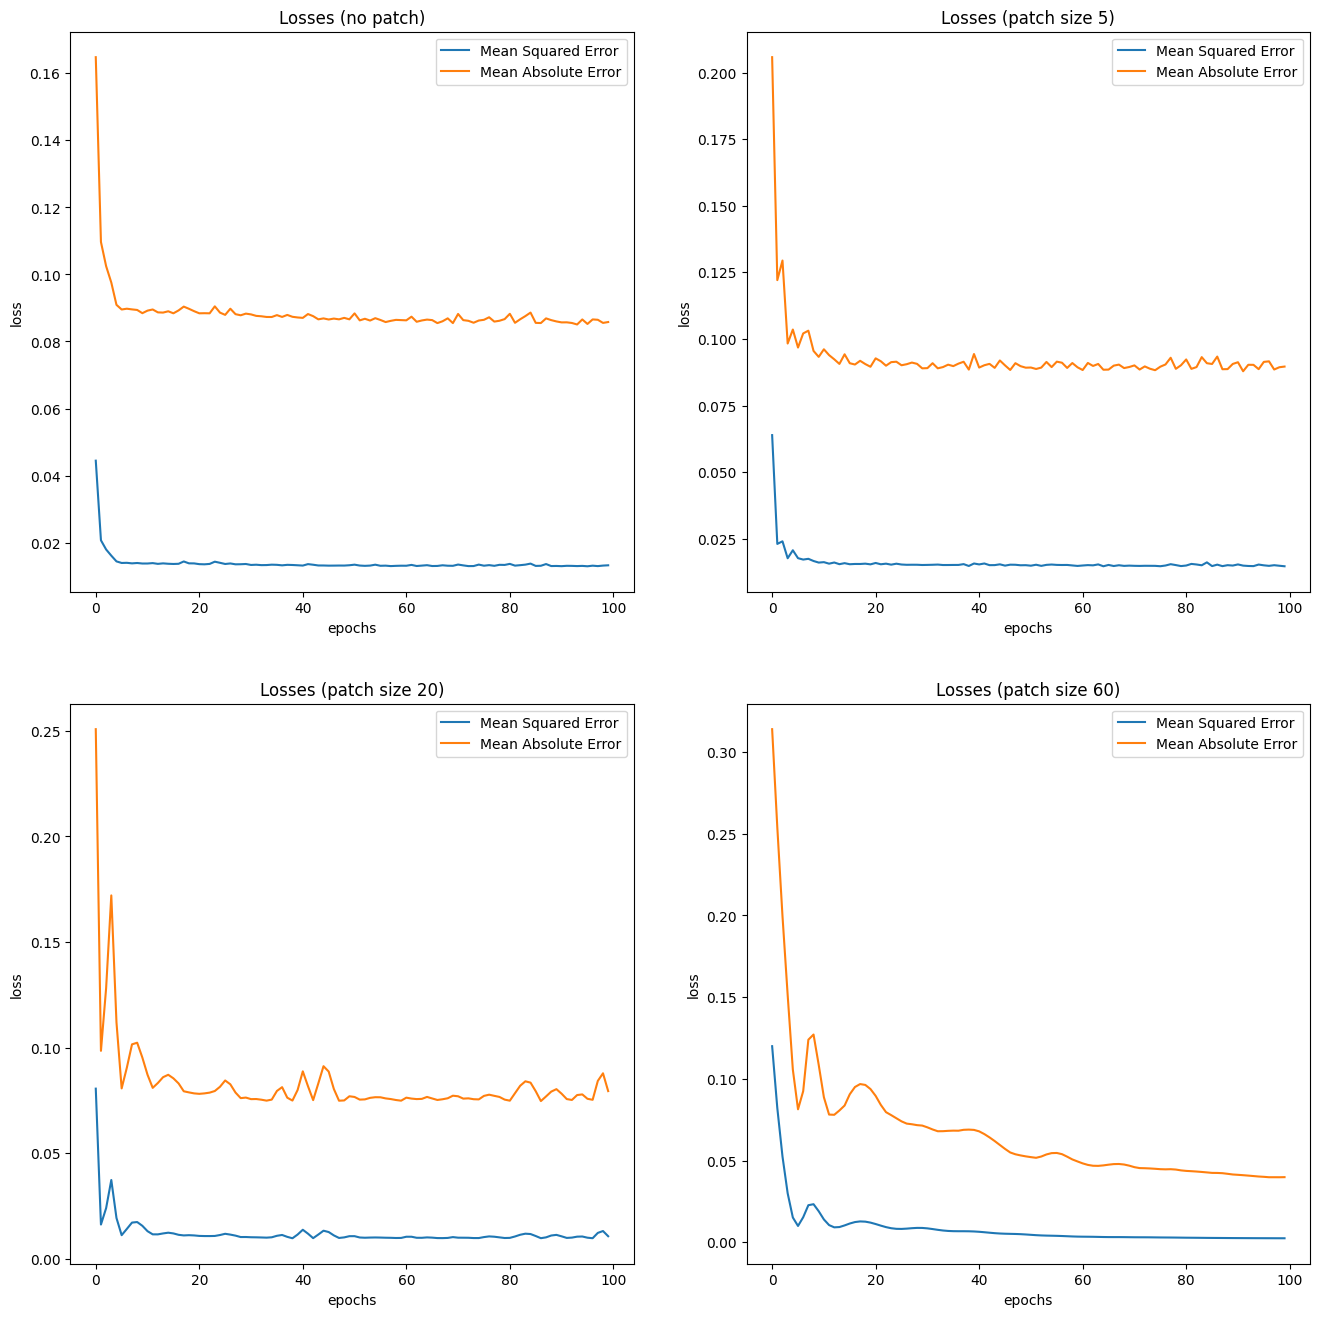

In [15]:

fig, (axs) = plt.subplots(2, 2, figsize=(16, 16))
# fig(figsize=(16, 16))
axs[0, 0].plot(history.history["loss"])
axs[0, 0].plot(history.history["mean_absolute_error"])
axs[0, 0].set_title("Losses (no patch)")
axs[0, 0].legend(['Mean Squared Error','Mean Absolute Error'])
axs[0, 0].set_xlabel("epochs")
axs[0, 0].set_ylabel("loss")


axs[0, 1].plot(history_p5.history["loss"])
axs[0, 1].plot(history_p5.history["mean_absolute_error"])
axs[0, 1].set_title("Losses (patch size 5)")
axs[0, 1].legend(['Mean Squared Error','Mean Absolute Error'])
axs[0, 1].set_xlabel("epochs")
axs[0, 1].set_ylabel("loss")


axs[1, 0].plot(history_p20.history["loss"])
axs[1, 0].plot(history_p20.history["mean_absolute_error"])
axs[1, 0].set_title("Losses (patch size 20)")
axs[1, 0].legend(['Mean Squared Error','Mean Absolute Error'])
axs[1, 0].set_xlabel("epochs")
axs[1, 0].set_ylabel("loss")


axs[1, 1].plot(history_p60.history["loss"])
axs[1, 1].plot(history_p60.history["mean_absolute_error"])
axs[1, 1].set_title("Losses (patch size 60)")
axs[1, 1].legend(['Mean Squared Error','Mean Absolute Error'])
axs[1, 1].set_xlabel("epochs")
axs[1, 1].set_ylabel("loss")


In [23]:
train_pred = scaler.inverse_transform(model.predict(x_train))
train_pred_p5 = scaler.inverse_transform(model_p5.predict(x_train_p5))
train_pred_p20 = scaler.inverse_transform(model_p20.predict(x_train_p20))
train_pred_p60 = scaler.inverse_transform(model_p60.predict(x_train_p60))

val_pred = scaler.inverse_transform(model.predict(x_val))
val_pred_p5 = scaler.inverse_transform(model_p5.predict(x_val_p5))
val_pred_p20 = scaler.inverse_transform(model_p20.predict(x_val_p20))
val_pred_p60 = scaler.inverse_transform(model_p60.predict(x_val_p60))

test_pred = scaler.inverse_transform(model.predict(x_test))
test_pred_p5 = scaler.inverse_transform(model_p5.predict(x_test_p5))
test_pred_p20 = scaler.inverse_transform(model_p20.predict(x_test_p20))
test_pred_p60 = scaler.inverse_transform(model_p60.predict(x_test_p60))

y_train = scaler.inverse_transform(y_train)
y_train_p5 = scaler.inverse_transform(y_train_p5)
y_train_p20 = scaler.inverse_transform(y_train_p20)
y_train_p60 = scaler.inverse_transform(y_train_p60)

y_val = scaler.inverse_transform(y_val)
y_val_p5 = scaler.inverse_transform(y_val_p5)
y_val_p20 = scaler.inverse_transform(y_val_p20)
y_val_p60 = scaler.inverse_transform(y_val_p60)

y_test = scaler.inverse_transform(y_test)
y_test_p5 = scaler.inverse_transform(y_test_p5)
y_test_p20 = scaler.inverse_transform(y_test_p20)
y_test_p60 = scaler.inverse_transform(y_test_p60)
print(len(y_train), len(y_train_p5), len(y_train_p20), len(y_train_p60) )
print(len(train_pred), len(train_pred_p5), len(train_pred_p20), len(train_pred_p60) )

12/12 [==============================] - 0s 3ms/step
720 144 36 12
720 720 720 720


In [24]:
from sklearn.metrics import mean_squared_error

train_rmse = mean_squared_error(y_train, train_pred,  squared=False)
train_rmse_p5 = mean_squared_error(y_train_p5, train_pred_p5,  squared=False)
train_rmse_p20 = mean_squared_error(y_train_p20, train_pred_p20,  squared=False)
train_rmse_p60 = mean_squared_error(y_train_p60, train_pred_p60,  squared=False)

val_rmse = mean_squared_error(y_val, val_pred,  squared=False)
val_rmse_p5 = mean_squared_error(y_val_p5, val_pred_p5,  squared=False)
val_rmse_p20 = mean_squared_error(y_val_p20, val_pred_p20,  squared=False)
val_rmse_p60 = mean_squared_error(y_val_p60, val_pred_p60,  squared=False)

test_rmse = mean_squared_error(y_test, test_pred,  squared=False)
test_rmse_p5 = mean_squared_error(y_test_p5, test_pred_p5,  squared=False)
test_rmse_p20 = mean_squared_error(y_test_p20, test_pred_p20,  squared=False)
test_rmse_p60 = mean_squared_error(y_test_p60, test_pred_p60,  squared=False)

print(f"Train RMSE (no patch) : {train_rmse}")
print(f"Val RMSE (no patch) : {val_rmse}")
print(f"Test RMSE (no patch) : {test_rmse}")
print("------------------------------")
print(f"Train RMSE (patch size 5) : {train_rmse_p5}")
print(f"Val RMSE (patch size 5) : {val_rmse_p5}")
print(f"Test RMSE (patch size 5) : {test_rmse_p5}")
print("------------------------------")
print(f"Train RMSE (patch size 20) : {train_rmse_p20}")
print(f"Val RMSE (patch size 20) : {val_rmse_p20}")
print(f"Test RMSE (patch size 20) : {test_rmse_p20}")
print("------------------------------")
print(f"Train RMSE (patch size 60) : {train_rmse_p60}")
print(f"Val RMSE (patch size 60) : {val_rmse_p60}")
print(f"Test RMSE (patch size 60) : {test_rmse_p60}")
print(len(y_train), len(y_train_p5), len(y_train_p20), len(y_train_p60) )
print(len(train_pred), len(train_pred_p5), len(train_pred_p20), len(train_pred_p60) )

Train RMSE (no patch) : 11.421091017859299
Val RMSE (no patch) : 10.708308549589697
Test RMSE (no patch) : 10.816929741076834
------------------------------
Train RMSE (patch size 5) : 11.92024225803579
Val RMSE (patch size 5) : 11.203823123401573
Test RMSE (patch size 5) : 11.328828500274675
------------------------------
Train RMSE (patch size 20) : 12.110455029702528
Val RMSE (patch size 20) : 11.384306186369459
Test RMSE (patch size 20) : 11.51312976396398
------------------------------
Train RMSE (patch size 60) : 12.113103280129133
Val RMSE (patch size 60) : 11.390039715496716
Test RMSE (patch size 60) : 11.518397934531503
720 144 36 12
720 720 720 720


In [18]:
train_p = pd.DataFrame(data={'Predictions':train_pred.flatten(), 'Actuals':y_train.flatten()})
train_p5 = pd.DataFrame(data={'Predictions':train_pred_p5.flatten(), 'Actuals':y_train_p5.flatten()})
train_p20 = pd.DataFrame(data={'Predictions':train_pred_p20.flatten(), 'Actuals':y_train_p20.flatten()})
train_p60 = pd.DataFrame(data={'Predictions':train_pred_p60.flatten(), 'Actuals':y_train_p60.flatten()})

val_p = pd.DataFrame(data={'Predictions':val_pred.flatten(), 'Actuals':y_val.flatten()})
val_p5 = pd.DataFrame(data={'Predictions':val_pred_p5.flatten(), 'Actuals':y_val_p5.flatten()})
val_p20 = pd.DataFrame(data={'Predictions':val_pred_p20.flatten(), 'Actuals':y_val_p20.flatten()})
val_p60 = pd.DataFrame(data={'Predictions':val_pred_p60.flatten(), 'Actuals':y_val_p60.flatten()})

test_p = pd.DataFrame(data={'Predictions':test_pred.flatten(), 'Actuals':y_test.flatten()})
test_p5 = pd.DataFrame(data={'Predictions':test_pred_p5.flatten(), 'Actuals':y_test_p5.flatten()})
test_p20 = pd.DataFrame(data={'Predictions':test_pred_p20.flatten(), 'Actuals':y_test_p20.flatten()})
test_p60 = pd.DataFrame(data={'Predictions':test_pred_p60.flatten(), 'Actuals':y_test_p60.flatten()})

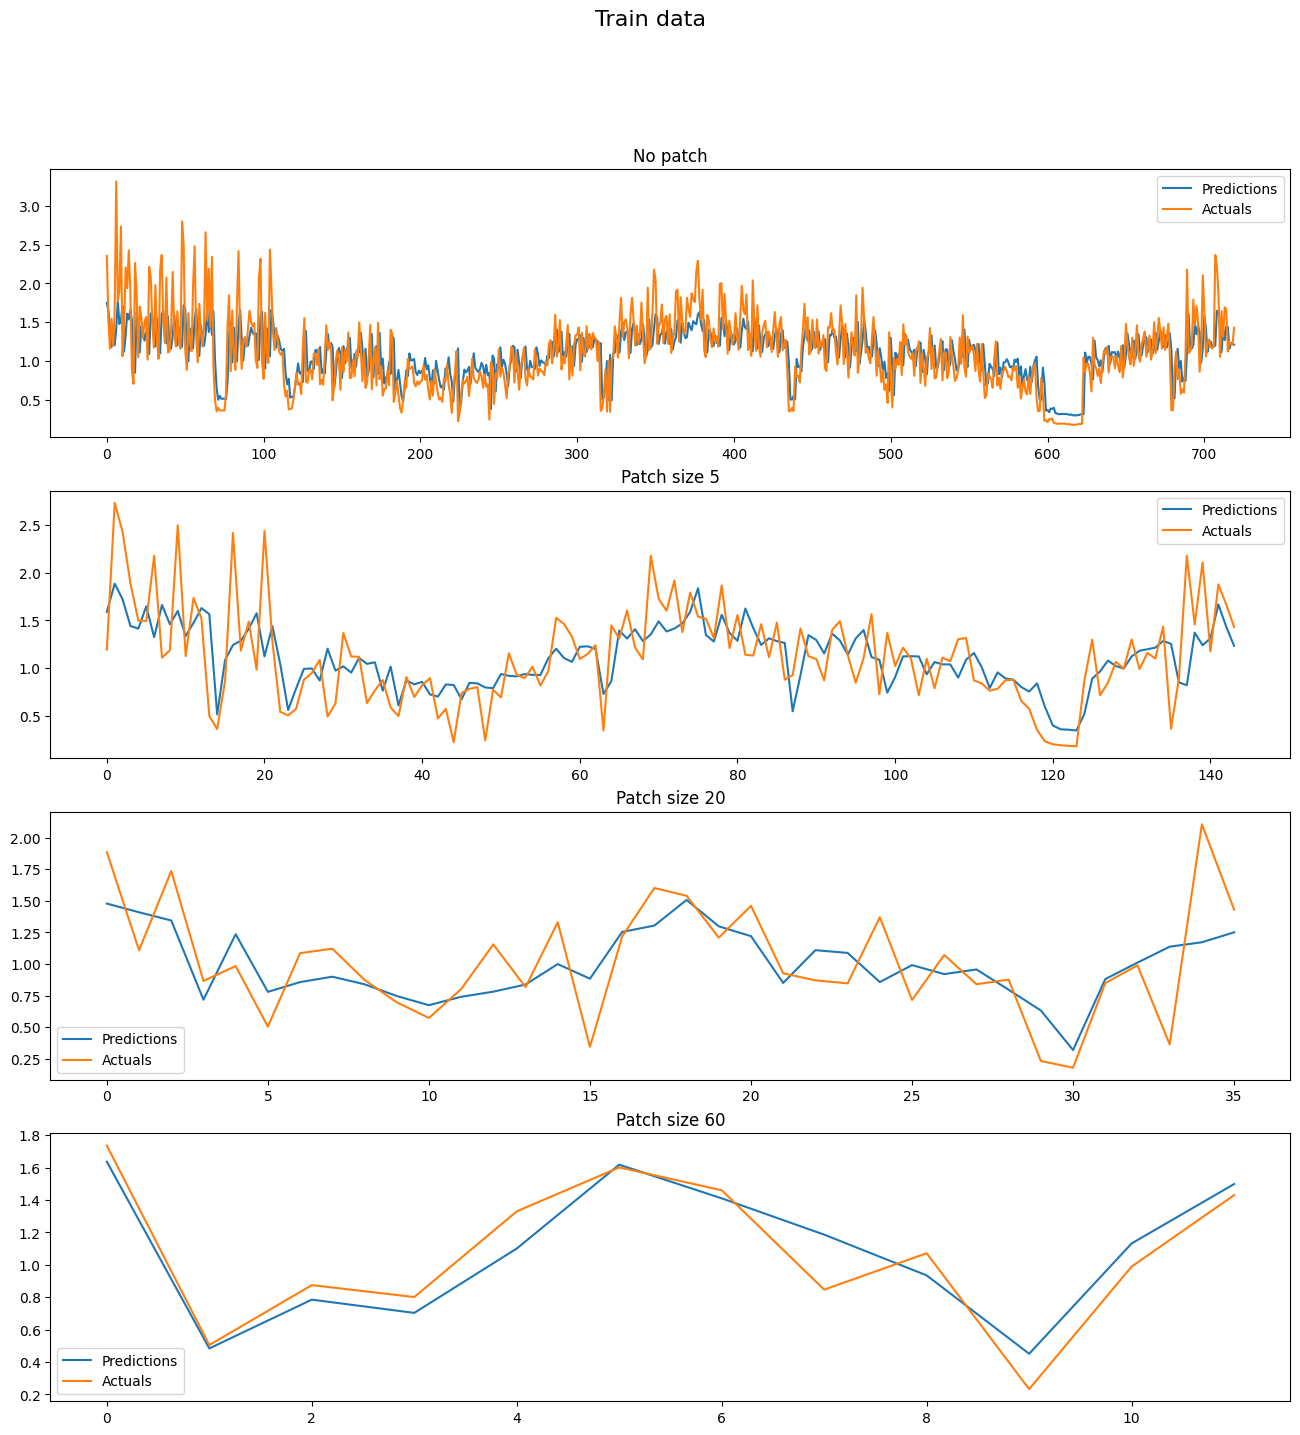

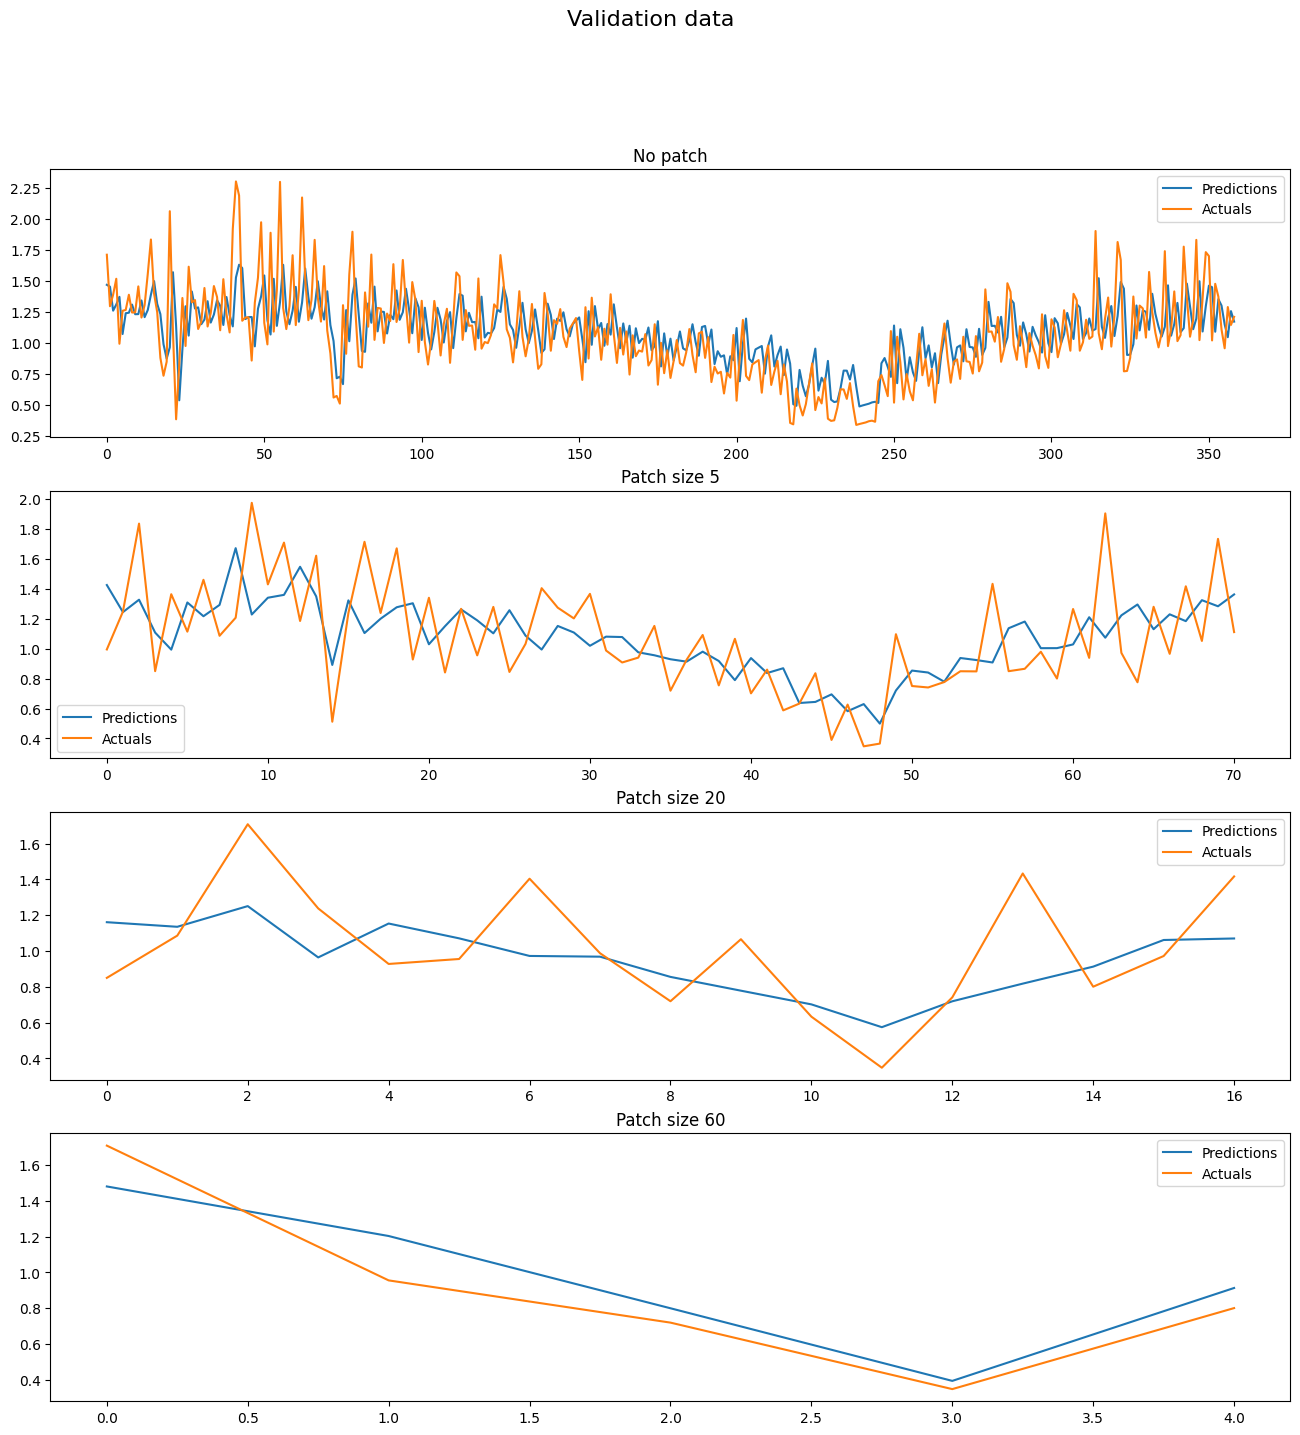

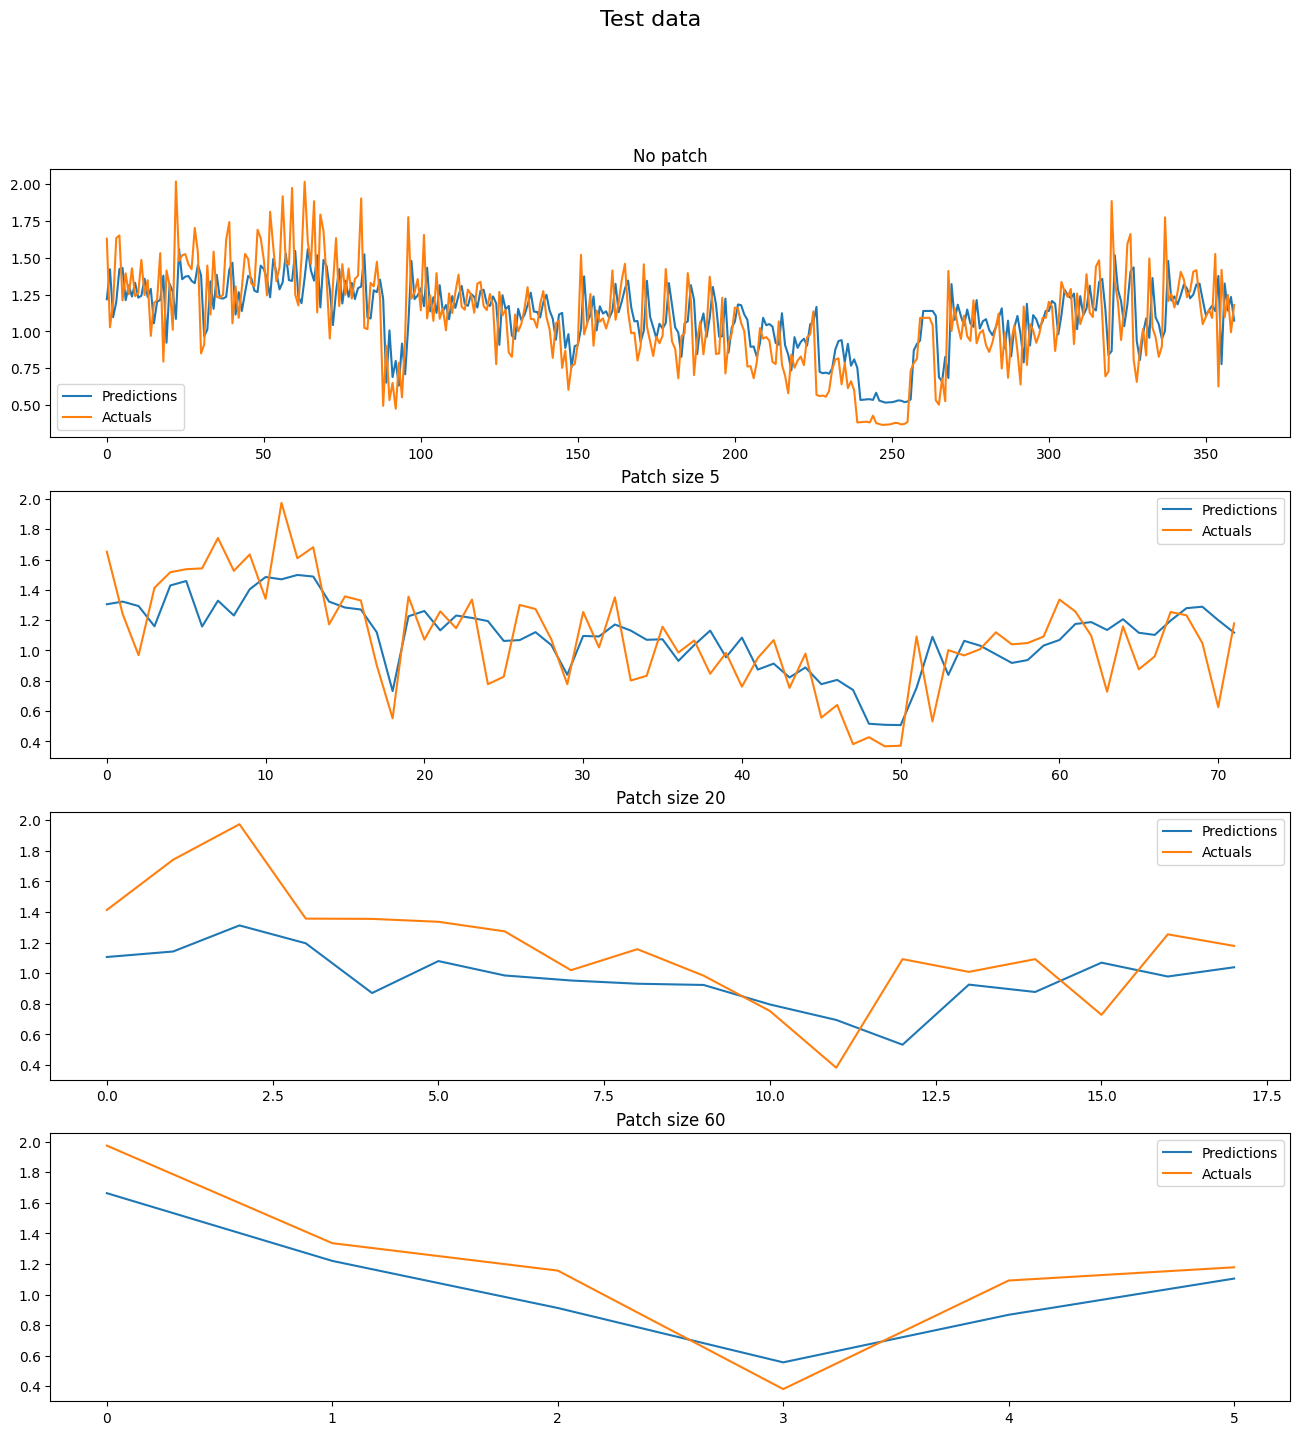

In [19]:
# plt.figure(figsize = (16, 6))
# plt.plot(preds_acts['Predictions'])
# plt.plot(preds_acts['Actuals'])
# plt.legend(['Predictions', 'Actuals'])
# plt.show()

def plotGraph(p, p5, p20, p60, title):
    fig, (axs) = plt.subplots(4, figsize=(16, 16))
    # fig(figsize=(16, 16))
    axs[0].plot(p['Predictions'])
    axs[0].plot(p['Actuals'])
    axs[0].legend(['Predictions', 'Actuals'])
    axs[0].set_title("No patch")

    axs[1].plot(p5['Predictions'])
    axs[1].plot(p5['Actuals'])
    axs[1].legend(['Predictions', 'Actuals'])
    axs[1].set_title("Patch size 5")

    axs[2].plot(p20['Predictions'])
    axs[2].plot(p20['Actuals'])
    axs[2].legend(['Predictions', 'Actuals'])
    axs[2].set_title("Patch size 20")

    axs[3].plot(p60['Predictions'])
    axs[3].plot(p60['Actuals'])
    axs[3].legend(['Predictions', 'Actuals'])
    axs[3].set_title("Patch size 60")
    fig.suptitle(title, fontsize=16)
    
plotGraph(train_p, train_p5, train_p20, train_p60, "Train data")
plotGraph(val_p, val_p5, val_p20, val_p60, "Validation data")
plotGraph(test_p, test_p5, test_p20, test_p60, "Test data")
